# Insights to include in report
- most accidents take place during landing or takeoff.
- a lot of the accidents appear to be grouped around bodies of water, like florida -- even though florida is not as densely populated as the bay area, new york, it seems to have just as many or more accidents than those areas. 
- looks like accidents decreased over time. reassure clients that planes have been getting safer over time (cite reference?)
- the airports with the most accidents: Chicago O'Hare (IL), Centennial Airport (CO), Merrill Field Airport (AK), Denver International Airport (CO), Wittman Regional Airport (WI)
- Some of the busiest Some examples of busy private jet airports you might never know about if you fly commercially include Teterboro for the New York City area, Van Nuys for Los Angeles, **Denver’s Centennial Airport**, Peachtree DeKalb in Atlanta, Scottsdale Airport (SDL) serving the Phoenix area, Laurence G. Hanscom Field in Bedford, Massachusetts, serving Boston, Opa Locka in Miami and Chicago Executive Airport.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

In [184]:
#read in the data that was obtained from .xml and .json files
df = pd.read_csv("complete_accident_data.csv", index_col=[0])

In [185]:
df.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate
0,20150901X74304,Accident,GAA15CA244,9/1/2015,"Truckee, CA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN
1,20150901X92332,Accident,CEN15LA392,8/31/2015,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Preliminary,9/4/2015
2,20150902X61853,Accident,GAA15CA246,8/30/2015,"New Milford, CT",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN
3,20150901X02521,Accident,GAA15CA243,8/30/2015,"New Enterprise, PA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN
4,20150831X61356,Accident,GAA15CA242,8/29/2015,"MIDLOTHIAN, TX",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN


# 1. Determine what fields you have available for each incident record.

In [187]:
#here are the fields we have for analysis
df.columns

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'Latitude', 'Longitude', 'AirportCode',
       'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberOfEngines', 'EngineType', 'FARDescription', 'Schedule',
       'PurposeOfFlight', 'AirCarrier', 'TotalFatalInjuries',
       'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured',
       'WeatherCondition', 'BroadPhaseOfFlight', 'ReportStatus',
       'PublicationDate'],
      dtype='object')

# 2. Prepare descriptive statistics that convey an overview of the data.
- 3. If/Where you feel it is appropriate, visualize the data to help build a narrative around the descriptive statistics.

In [16]:
#let's get value counts for each category
categories = ['InvestigationType',
 'AircraftDamage',
 'AircraftCategory',
 'AmateurBuilt',
 'NumberOfEngines',
 'EngineType',
 'FARDescription',
 'Schedule',
 'PurposeOfFlight',
 'WeatherCondition',
 'BroadPhaseOfFlight',
 'ReportStatus']

for x in list(categories):
    print("Variable name: " + str(x))
    print(" ")
    print(df[x].value_counts())
    print(" ")
    print("----------------------------")
    #print(" ")

Variable name: InvestigationType
 
Accident    74207
Incident     3050
Name: InvestigationType, dtype: int64
 
----------------------------
Variable name: AircraftDamage
 
Substantial    55420
Destroyed      17003
Minor           2450
Name: AircraftDamage, dtype: int64
 
----------------------------
Variable name: AircraftCategory
 
Airplane             14210
Helicopter            1775
Glider                 261
Balloon                120
Gyrocraft               62
Unknown                 40
Weight-Shift            20
Ultralight              18
Powered Parachute       10
Powered-Lift             2
Blimp                    1
Rocket                   1
Name: AircraftCategory, dtype: int64
 
----------------------------
Variable name: AmateurBuilt
 
No     69198
Yes     7405
Name: AmateurBuilt, dtype: int64
 
----------------------------
Variable name: NumberOfEngines
 
1.0     61465
2.0      9854
0.0      1132
3.0       477
4.0       406
24.0        1
18.0        1
Name: NumberOfEngines,

In [190]:
#understandably, the "Make" column needs to be recoded to account for repeats and misentered data, but 
# we can see that the most common kind of plane that leads to accidents is Cessna and Piper planes, which are personal aircraft
df.Make.value_counts().sort_values(ascending=False)[:20]

CESSNA         16609
PIPER           9179
Cessna          7739
Piper           4096
BEECH           3030
Beech           1748
BELL            1515
BOEING          1286
GRUMMAN          903
Bell             887
Boeing           777
MOONEY           743
BELLANCA         681
HUGHES           564
Robinson         526
ROBINSON         453
Mooney           444
SCHWEIZER        429
AERONCA          390
Air Tractor      364
Name: Make, dtype: int64

In [209]:
#count the most popular plane manufacturers to see if cessna is indeed one of the most popular makes in the accident list
#this accounts for the different spelling and cases of cessnas

#get rid of NaN values
nonan = df.Make.replace(np.nan, '', regex=True)

#make all names lowercase
makelist = [x.lower() for x in nonan]

#create a dictionary to keep track of the counts
countdict = {'cessna':0,
             'piper': 0,
             'beech': 0,
             'bell': 0,
             'grumman': 0,
             'airbus':0,
            'boeing':0,
            'bombardier': 0,
            'embraer': 0}
for x in makelist:
    if 'cessna' in x:
        countdict['cessna'] += 1
    elif 'piper' in x:
        countdict['piper'] += 1
    elif 'beech' in x:
        countdict['beech'] += 1
    elif 'bell' in x:
        countdict['bell'] += 1
    elif 'grumman' in x:
        countdict ['grumman'] += 1
    elif 'airbus' in x:
        countdict['airbus'] += 1
    elif 'boeing' in x:
        countdict['boeing'] += 1
    elif 'bombardier' in x:
        countdict['bombardier'] += 1
    elif 'embraer' in x:
        countdict['embraer'] += 1
countdict

{'cessna': 24388,
 'piper': 13315,
 'beech': 4847,
 'bell': 3464,
 'grumman': 1563,
 'airbus': 270,
 'boeing': 2132,
 'bombardier': 117,
 'embraer': 192}

In [214]:
#count the number of planes in the dataset that are cessnas or piper planes
(countdict['cessna'] + countdict['piper'])

#count the proportion of accidents that are due to Cessna or Piper
(countdict['cessna'] + countdict['piper'])/len(df)

0.48802050299649224

In [232]:
#count the proportion of accidents that are in single-engine plane. 
#This accounts for all planes that are personal, not just Cessna and piper
df.NumberOfEngines.value_counts()[1]/len(df)

0.7955913380017344

In [231]:
#personal aircraft usually only have one engine, whereas commercial liners have 2-4. 
#let's see how much more likely you are to have an accident in a personal aircraft vs. a commercial liner or other airliner.
#this might help our client feel safer about flying commercial

#here we calculate the proportion of records in the dataset that have 1 engine only
prop1engine = df.NumberOfEngines.value_counts()[1]/len(df)

#all others
others = 1 - prop1engine

proportion = prop1engine/others

print("you are about " + str(np.round(proportion,2)) + " times more likely to have an accident in a 1-engine plane than in another kind of plane")

you are about 3.89 times more likely to have an accident in a 1-engine plane than in another kind of plane


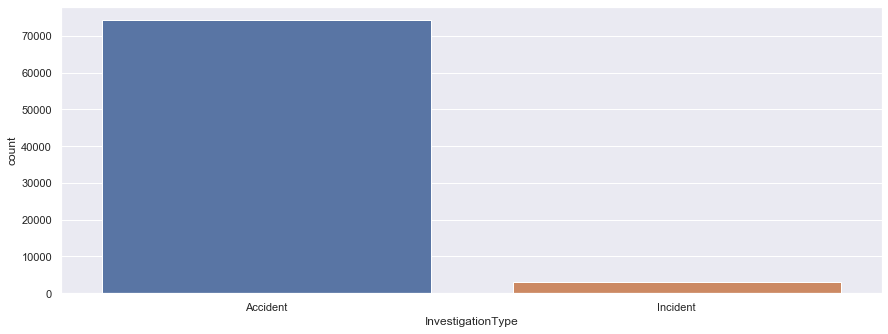

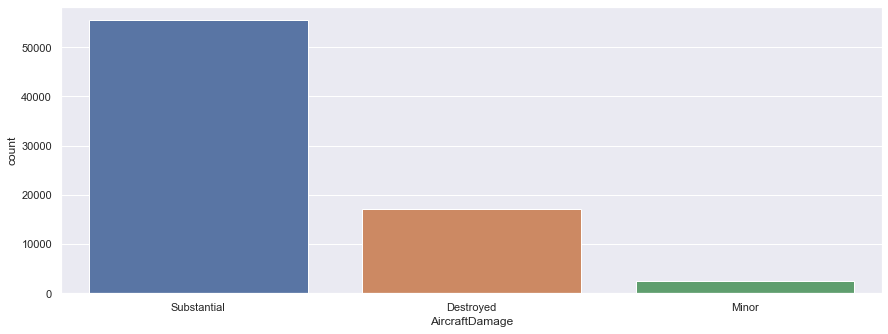

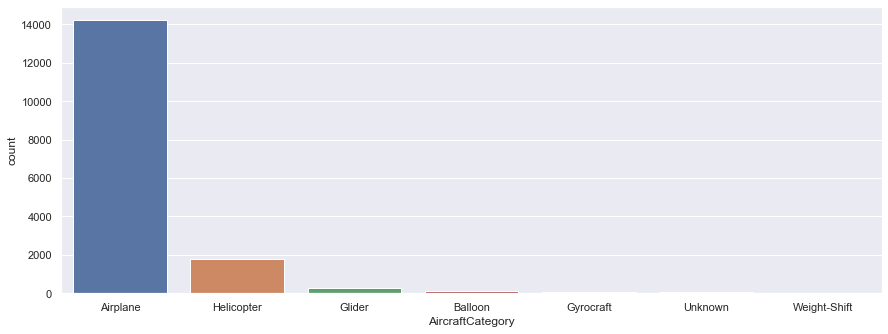

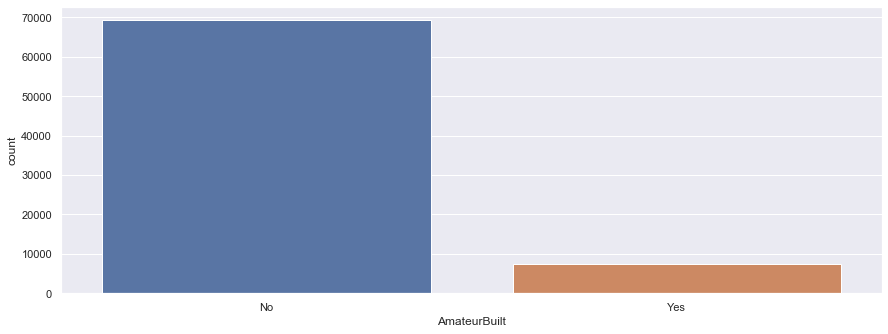

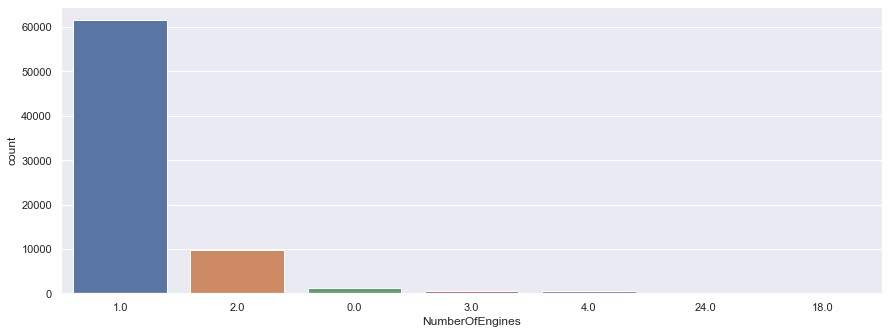

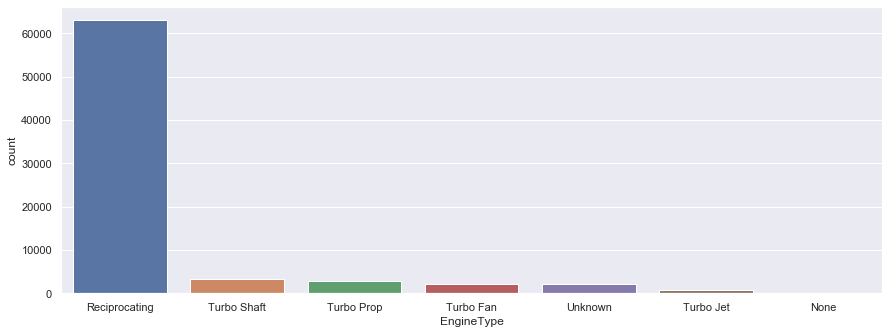

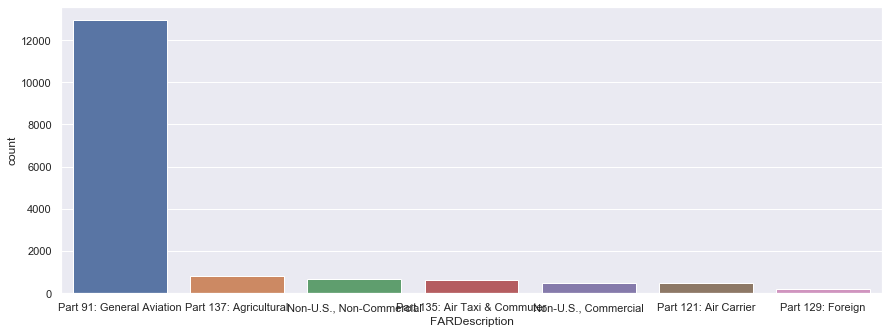

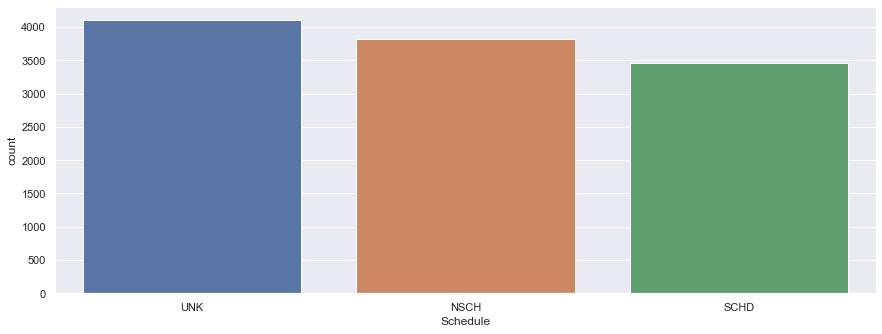

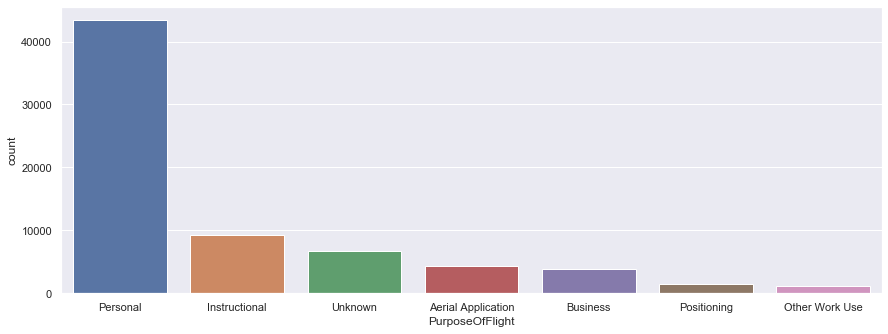

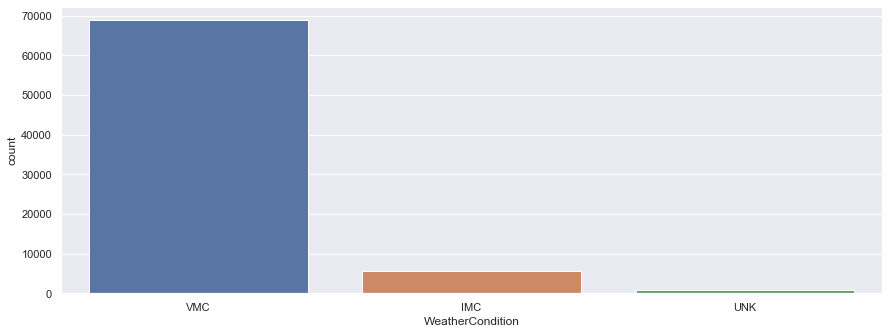

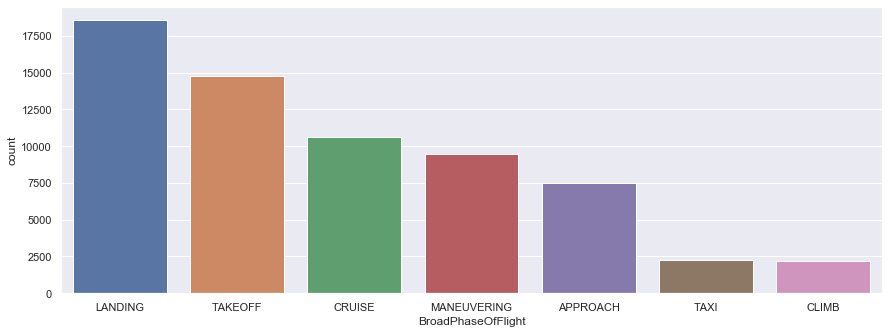

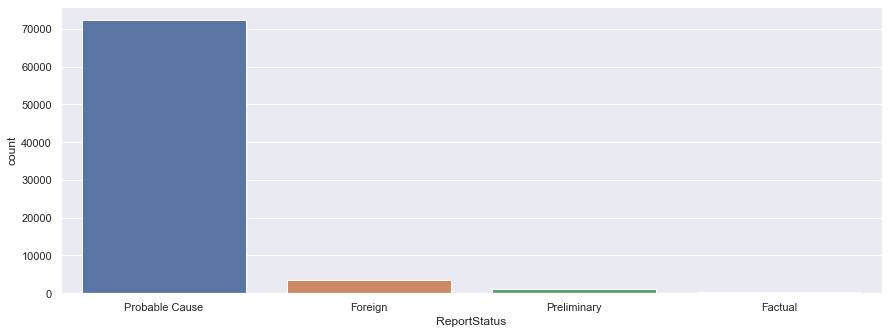

In [32]:
#PLOT COUNTS OF CATEGORICAL DATA SO THAT WE CAN SEE WHAT IS MOST PREVALENT. 
#these are plots of counts
#only plot the top 7 categories, ordered from most count to least count, so that the bars are visible

#figure styling
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14.7,5.27)})

#plot all the categorical categories, barplot style
for x in categories:
    sns.countplot(x=x, data = df, order = df[x].value_counts().iloc[:7].index)
    plt.show()

In [45]:
import os
os.environ["PROJ_LIB"] = "C:\\Users\\Alicia\\Anaconda3\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap

In [46]:
#geoplot
import matplotlib as mlt
from PIL import Image
from pylab import rcParams

In [35]:
df.columns

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'Latitude', 'Longitude', 'AirportCode',
       'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberOfEngines', 'EngineType', 'FARDescription', 'Schedule',
       'PurposeOfFlight', 'AirCarrier', 'TotalFatalInjuries',
       'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured',
       'WeatherCondition', 'BroadPhaseOfFlight', 'ReportStatus',
       'PublicationDate'],
      dtype='object')

In [86]:
#grab just the longitude and latitude of locations that are available, not including nas 
locationdf = df[df['Latitude'].notna() & df['Longitude'].notna()][['Latitude','Longitude']]

#what percent of records contain lat/long data?
print("Only " + str(np.round(len(locationdf)/len(df)*100,2)) + "% of all records contain lat/long data")

#set upper and lower bound of latitude and longitude
llat=-54.57
ulat=68.53

llon=-167.40
ulon=168.57

Only 30.73% of all records contain lat/long data


C:\Users\Alicia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\Alicia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


Text(0.5, 1.0, 'Location of accidents (30.73% of all records)')

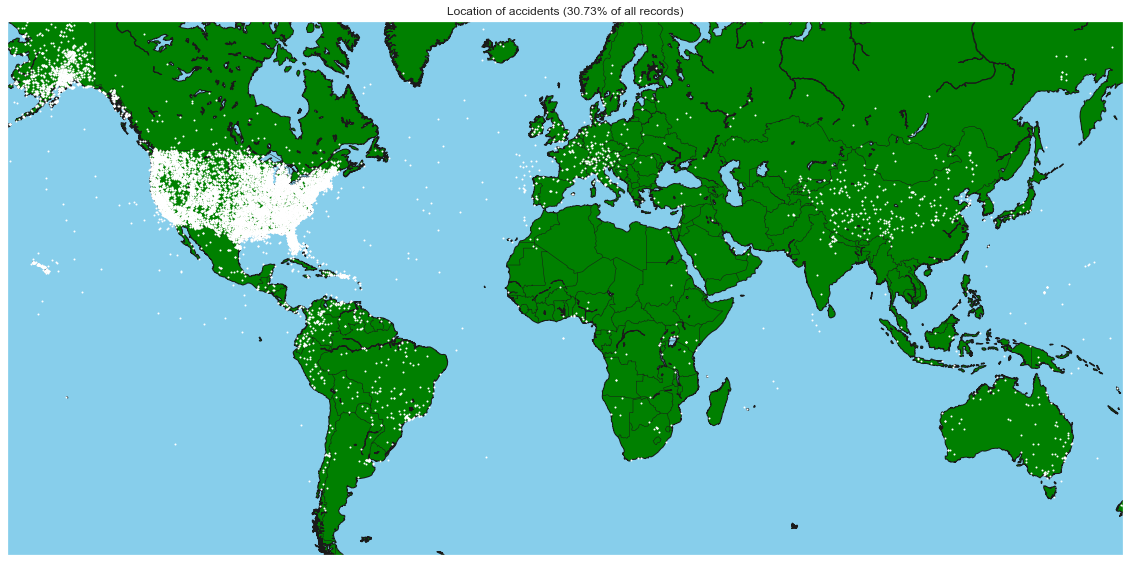

In [85]:
#plot the locations of all the accidents. remember that only 30.73% of all the records contain lat/long data
plt.figure(figsize=(20,10))
my_map = Basemap(projection='merc', resolution='l', area_thresh=1000.0,
                llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='green', ocean_color='skyblue')
xs,ys = my_map(np.asarray(locationdf.Longitude), np.asarray(locationdf.Latitude))
locationdf['x']= xs.tolist()
locationdf['y'] =ys.tolist()

for index,row in locationdf.iterrows():
    my_map.plot(row.x,row.y,markerfacecolor='white',
               markeredgecolor='white',marker='o',markersize=1)
plt.title("Location of accidents (30.73% of all records)")

#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)

In [88]:
#let's zoom into the United States, since this map is really dense and we can't really see what's going on here

#grab just the longitude and latitude of locations that are available, not including nas 
usdf = df[df['Latitude'].notna() & df['Longitude'].notna()
         & (df.Latitude > 18.355) & (df.Latitude < 50.597)
         & (df.Longitude > -130.474) & (df.Longitude < -61.479)][['Latitude','Longitude']]

#what percent of records contain lat/long data?
print("Only " + str(np.round(len(usdf)/len(df)*100,2)) + "% of all records contain US lat/long data")

#set upper and lower bound of latitude and longitude
llat=18.355
ulat=50.597

llon=-130.474
ulon=-61.479

Only 26.65% of all records contain US lat/long data


C:\Users\Alicia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\Alicia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\Alicia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 1.0, 'Location of accidents (26.65% of all records)')

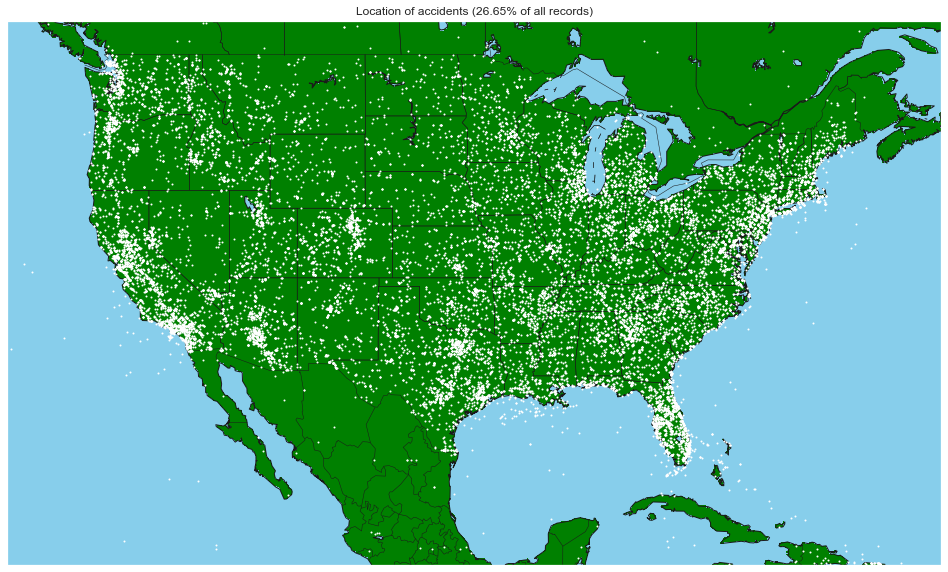

In [90]:
#plot the locations of all the accidents. remember that only 30.73% of all the records contain lat/long data
plt.figure(figsize=(20,10))
my_map = Basemap(projection='merc', resolution='l', area_thresh=1000.0,
                llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates()
my_map.drawlsmask(land_color='green', ocean_color='skyblue')
xs,ys = my_map(np.asarray(usdf.Longitude), np.asarray(usdf.Latitude))
usdf['x']= xs.tolist()
usdf['y'] =ys.tolist()

for index,row in usdf.iterrows():
    my_map.plot(row.x,row.y,markerfacecolor='white',
               markeredgecolor='white',marker='o',markersize=1)
plt.title("Location of accidents (26.65% of all records)")

#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)

In [93]:
#visualize data over the years

#convert to datetime object so we can aggregate
df['EventDate'] = pd.to_datetime(df['EventDate'])

In [107]:
#look at years for accident
years = pd.DataFrame(df.groupby(df.EventDate.dt.year).agg('count')['EventDate'].iloc[6:])

#create a dataframe with counts of accidents
yearcounts = [x for x in df.groupby(df.EventDate.dt.year).agg('count')['EventDate'].iloc[6:]]
years = list(df.groupby(df.EventDate.dt.year).agg('count').iloc[6:].index)
yearnums = pd.concat([pd.Series(years), pd.Series(yearcounts)], axis=1)
yearnums.columns = ['year', 'count']

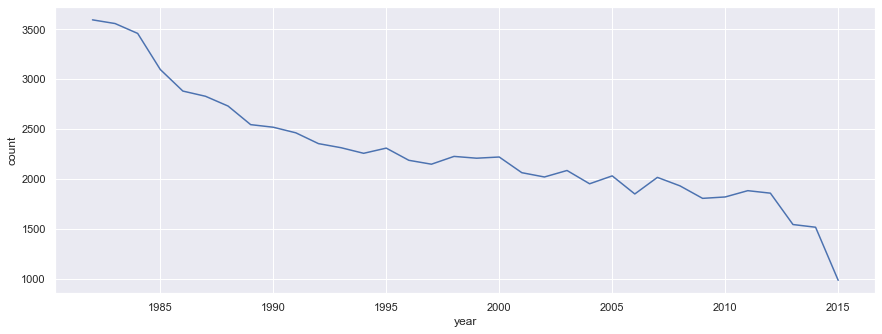

In [128]:
#plot the accidents over time on a yearly basis
sns.lineplot(data=yearnums, x='year', y='count')

In [129]:
#LET'S LOOK AT NUMBERS BY MONTH TO SEE IF THERE'S SOME SEASONALITY FOR ACCIDENTS. This is overall months.
#in further analysis, we'd want to do a time series to see if there is seasonality and trend, so we can
#   account for both years and months in our analysis.

In [131]:
#look at months for accident
months = pd.DataFrame(df.groupby(df.EventDate.dt.month).agg('count')['EventDate'])

#create a dataframe with counts of accidents
monthcounts = [x for x in df.groupby(df.EventDate.dt.month).agg('count')['EventDate']]
months = list(df.groupby(df.EventDate.dt.month).agg('count').index)
monthnums = pd.concat([pd.Series(months), pd.Series(monthcounts)], axis=1)
monthnums.columns = ['month', 'count']

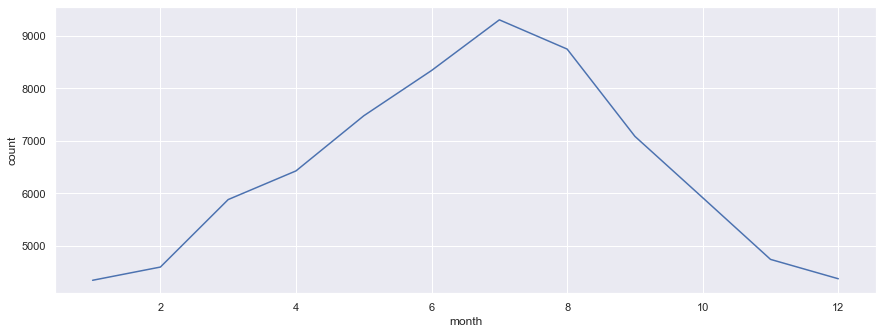

In [133]:
#plot the accidents over time on a monthly basis
#although accidents increase in the summer months, could it be because there are more flights during the summer
#    months, when people are taking vacations? Given more time we'd investigate this by merging in data. 
sns.lineplot(data=monthnums, x='month', y='count')

In [137]:
# let's find out the airportcode that has the highest number of accidents. Maybe we can tell our client
#    to avoid these airports, although we also need to account for total # of departing flights from this airline.
# for a true count, we'd want to recode the airport code, as there's inconsistent coding utilized throughout

# most accidents are affiliated with private airport, as well as ORD, APA, MRI, DEN, OSH

df.AirportCode.value_counts().sort_values(ascending=False)[:20]

NONE    1457
PVT      341
ORD      144
APA      140
MRI      124
DEN      114
OSH       90
BJC       86
FFZ       86
VNY       85
LGB       81
DVT       77
PRC       75
VGT       73
MIA       72
LAX       71
CNO       70
LAL       70
None      67
ANC       66
Name: AirportCode, dtype: int64

In [179]:
#create a table that aggregates by year the # of injury types
injurytable = pd.DataFrame(df[df.EventDate > '1981-12-31 00:00'].groupby(df.EventDate.dt.year).agg('sum')[['TotalFatalInjuries', 'TotalSeriousInjuries', 'TotalMinorInjuries']])

#make this dataframe long so it can be graphed by seaborn
longinjuries = injurytable.stack(level=0).rename_axis(['EventDate', 'Total']).reset_index()

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries
EventDate,,,
1982.0,1585.0,727.0,998.0
1983.0,1273.0,673.0,1048.0
1984.0,1229.0,697.0,1047.0
1985.0,1648.0,612.0,1108.0
1986.0,1180.0,619.0,970.0
1987.0,1237.0,554.0,936.0
1988.0,1195.0,620.0,1117.0
1989.0,1532.0,518.0,1029.0
1990.0,999.0,589.0,908.0


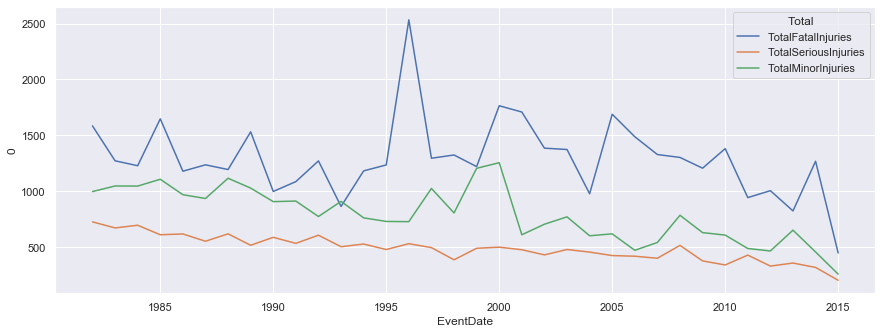

In [181]:
#let's look at fatalities over time, as well as serious and minor injuries over time. they look like they overall decrease.
# this can also help our client feel safer over time. 
sns.lineplot(data=longinjuries, x='EventDate', y=0, hue='Total')